# ABOUT THE DATA


What is the dataset all about?

The data used in this analysis is an Online Shoppers Purchasing Intention data set provided from a top ecommerce site. The data set was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

The primary purpose of the data set is to predict the purchasing intentions of a visitor to this particular store’s website based on inference.

## Dataset Dictionary
The columns of the dataset represents the following;

Administrative: This is the number of pages of this type (administrative) that the user visited.

Administrative_Duration: This is the amount of time spent in this category of pages.

Informational: This is the number of pages of this type (informational) that the user visited.

Informational_Duration: This is the amount of time spent in this category of pages.

ProductRelated: This is the number of pages of this type (product related) that the user visited.

ProductRelated_Duration: This is the amount of time spent in this category of pages.

BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

ExitRates: The percentage of pageviews on the website that end at that specific page.

PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.

More information about how this is calculated

SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. 

More information about how this value is calculated below.

Month: Contains the month the pageview occurred, in string form.

OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.

Browser: An integer value representing the browser that the user was using to view the page.

Region: An integer value representing which region the user is located in.

TrafficType: An integer value representing what type of traffic the user is categorized into.

VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

Weekend: A boolean representing whether the session is on a weekend.

Revenue: A boolean representing whether or not the user completed the purchase.

In [1]:
# Importing relevent libraries to be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
 # loading the  dataset
data = pd.read_csv('C:\\Users\\user\\Desktop\\10Alytics\\Online Shoppers Intention\\online_shoppers_intention.csv')

In [8]:
# viewing the head and tail of the dataset
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [9]:
# General information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

A key indicator to look out for in the general information of the dataset is the Non-Null Count which indicates if there are any missing values in the dataset.
Fortunately, the dataset did not contain missing values.

However, Weekend and revenus are boolean data type, conversion to numeric data type is important, so as to enable our model interact with those variables. True and false can be substituted for 1 and 0 respectively.

In [16]:
from sklearn import preprocessing
convert = preprocessing.LabelEncoder()
convert.fit(data['Weekend'])
data['Weekend'] = convert.transform(data['Weekend'])
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,0,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,0,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,0,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,0,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,1,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,1,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,1,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,0,False


In [17]:
from sklearn import preprocessing
convertt = preprocessing.LabelEncoder()
convertt.fit(data['Revenue'])
data['Revenue'] = convertt.transform(data['Revenue'])
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,0,0


In [18]:
# Statistical description of the dataset
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000


The statistical description of the dataset highlights the degree of central tendency and dispersion of the dataset.
Further Exploratory Data Analysis would confirm and expound more trends and patterns.

In [19]:
# Double checking for missing values in the dataset
data.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

The absence of missing values is confirmed

### Exploratory Data Analysis (EDA)
Performing EDA helps us dig into the data to uncover various trends and underlying patterns in the dataset.

In [20]:
# Exploring correlations between all the columns
data.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


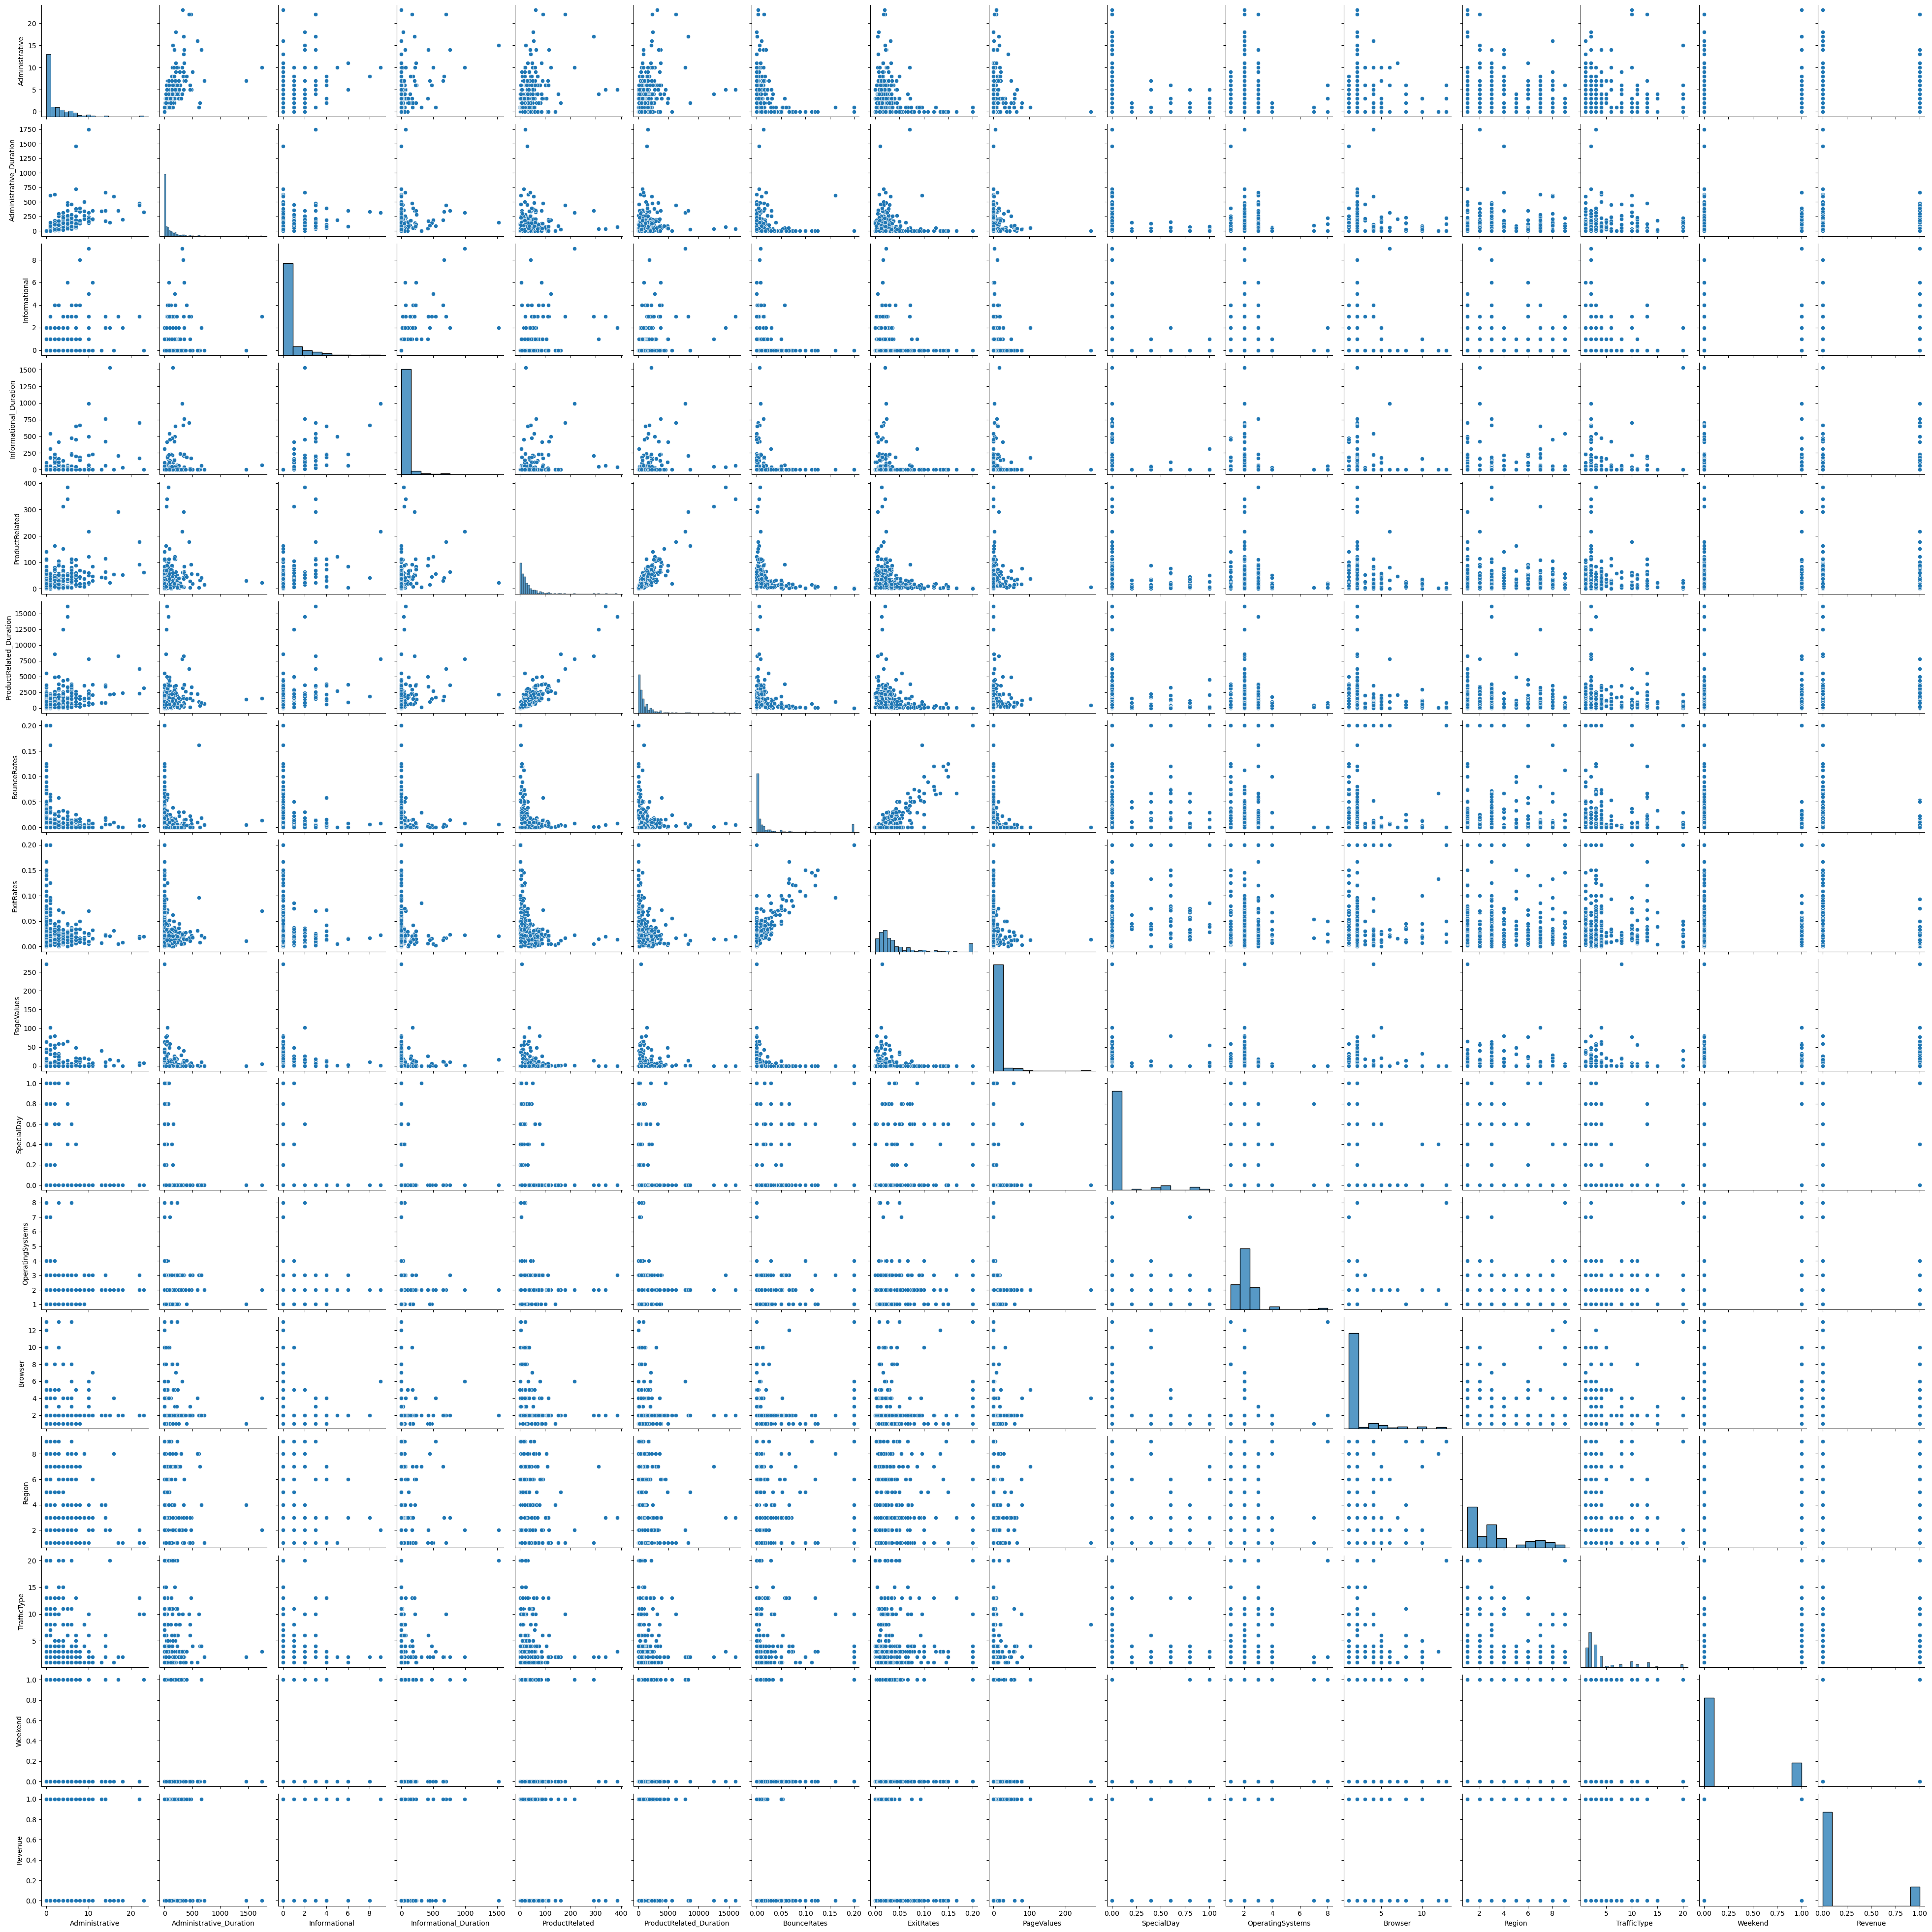

In [21]:
sns.pairplot(data.sample(400))
plt.show()

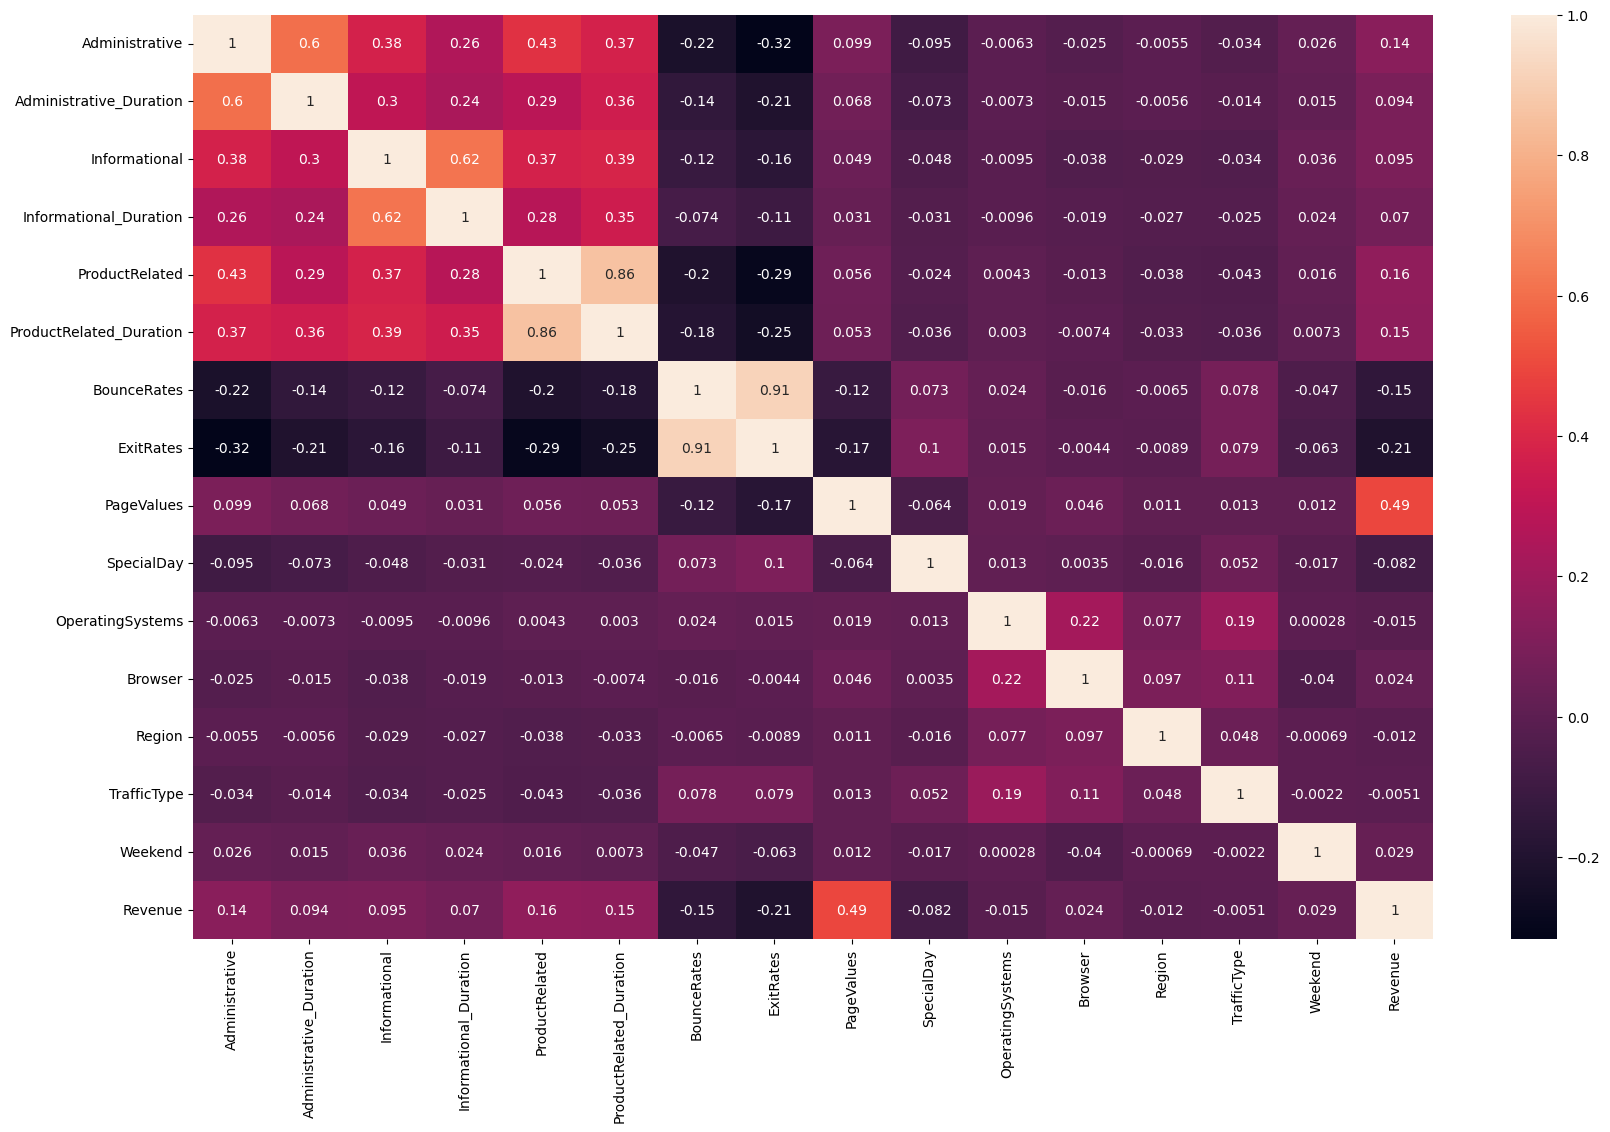

In [22]:
plt.figure(figsize=(20,12))

sns.heatmap(data.corr(),annot=True)
plt.show()

Exploring the correlation plots shows that the feature 'PageValues' has the strongest correlation to the label 'Revenue'. However, it is noteworthy to consider that these corrlation plots only take numerical variables into consideration, hence the need to keep exploring other visuals to take into account the categorical variables and the story they tell towards the label.

## Univariate Analysis

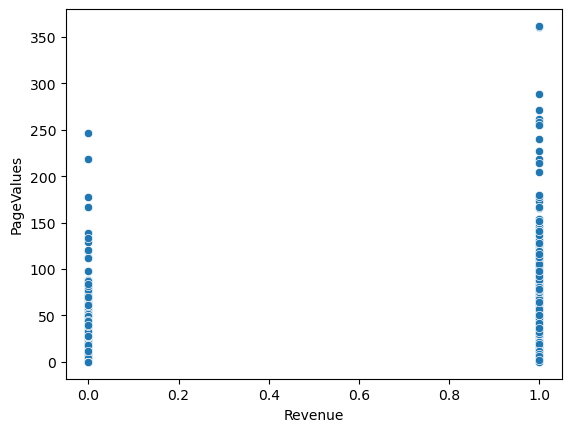

In [24]:
sns.scatterplot(x='Revenue',y='PageValues',data=data);
plt.show()

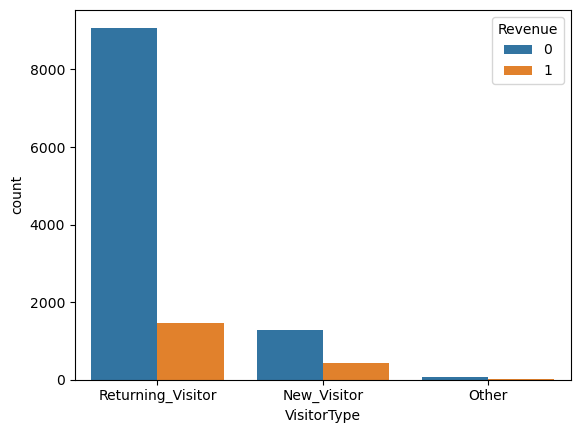

In [25]:
sns.countplot(x='VisitorType', hue='Revenue',data = data);
plt.show()

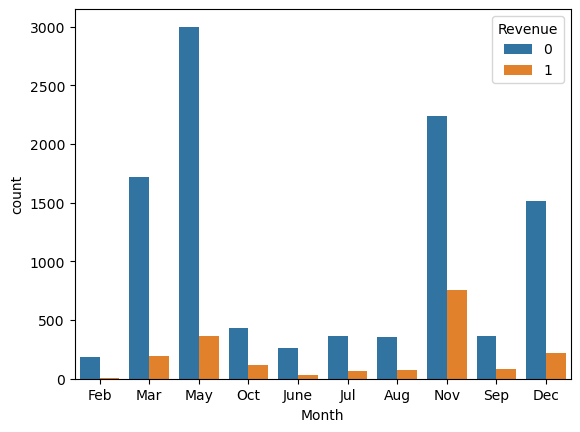

In [26]:
sns.countplot(x='Month', hue='Revenue',data = data);
plt.show()

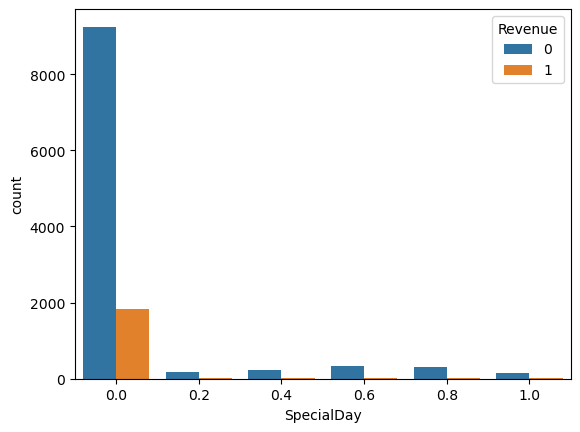

In [27]:
sns.countplot(x='SpecialDay', hue='Revenue',data = data);
plt.show()

## Multi-Variate Analysis

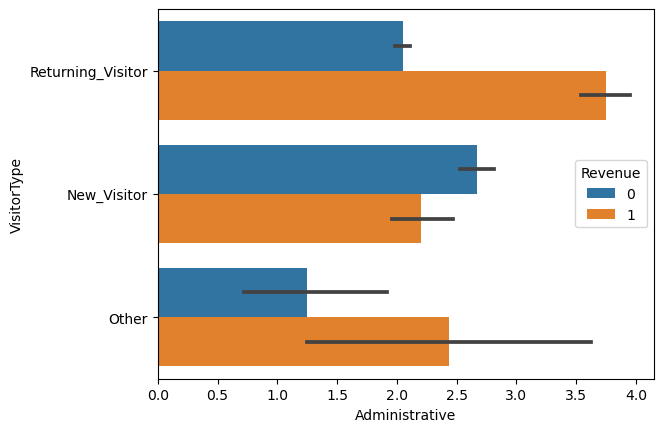

In [28]:
sns.barplot(x='Administrative',y='VisitorType',hue='Revenue',data=data);
plt.show()

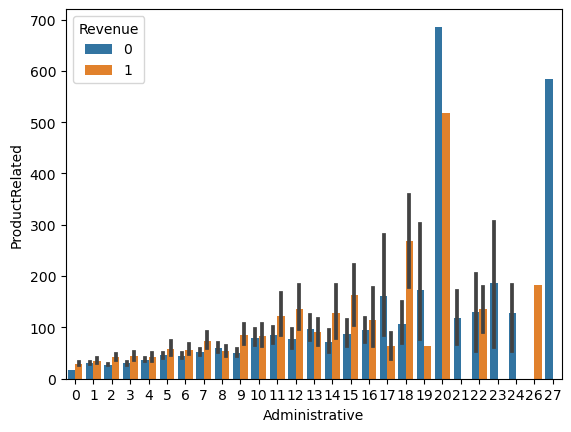

In [35]:
sns.barplot(x='Administrative',y='ProductRelated',hue='Revenue',data=data);
plt.show()

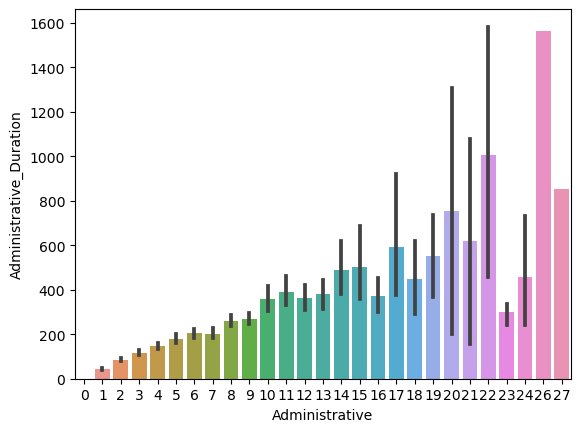

In [37]:
sns.barplot(x='Administrative',y='Administrative_Duration',data=data);
plt.show()

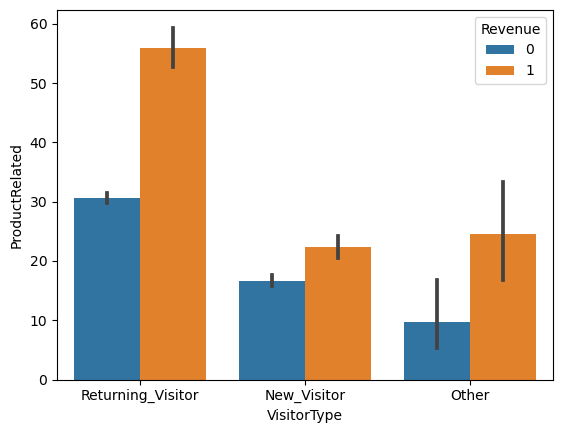

In [38]:
sns.barplot(x='VisitorType',y='ProductRelated',hue='Revenue',data=data);
plt.show()

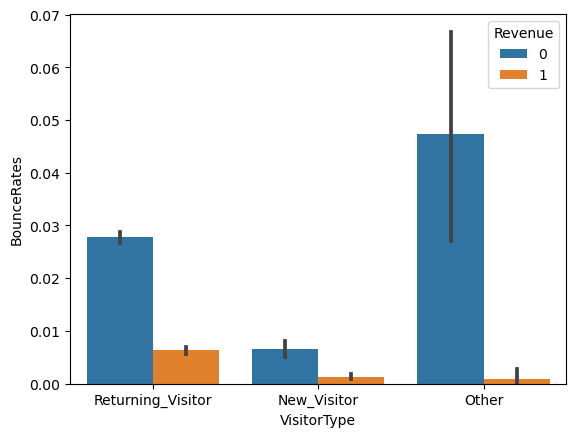

In [39]:
sns.barplot(x='VisitorType',y='BounceRates',hue='Revenue',data=data);
plt.show()

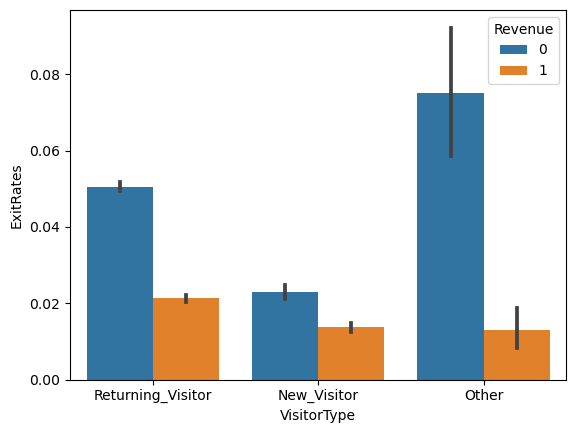

In [40]:
sns.barplot(x='VisitorType',y='ExitRates',hue='Revenue',data=data);
plt.show()

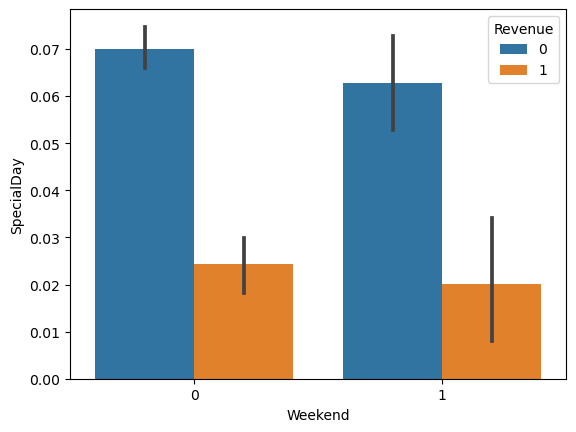

In [42]:
sns.barplot(x='Weekend',y='SpecialDay',hue='Revenue',data=data);
plt.show()

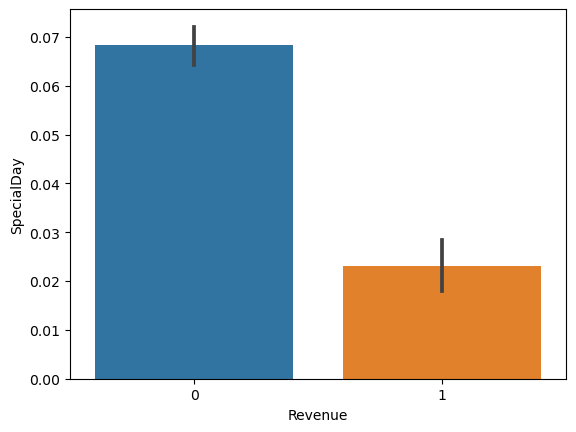

In [43]:
sns.barplot(x='Revenue',y='SpecialDay',data=data);
plt.show()

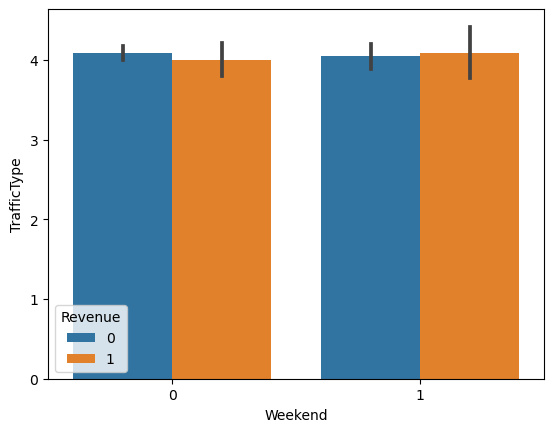

In [44]:
sns.barplot(x='Weekend',y='TrafficType',hue='Revenue',data=data);
plt.show()

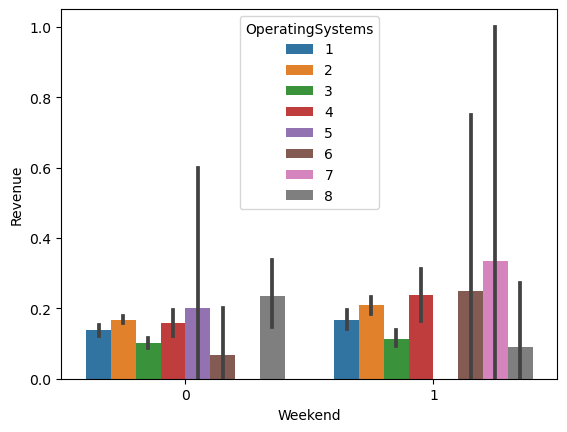

In [47]:
sns.barplot(x='Weekend',y='Revenue',hue='OperatingSystems',data=data);
plt.show()

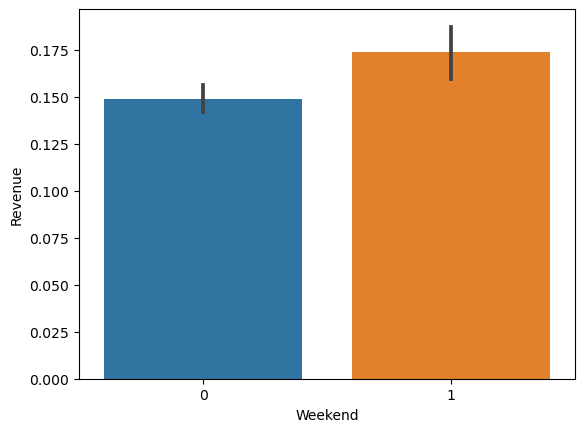

In [50]:
sns.barplot(x='Weekend',y='Revenue',data=data);
plt.show()

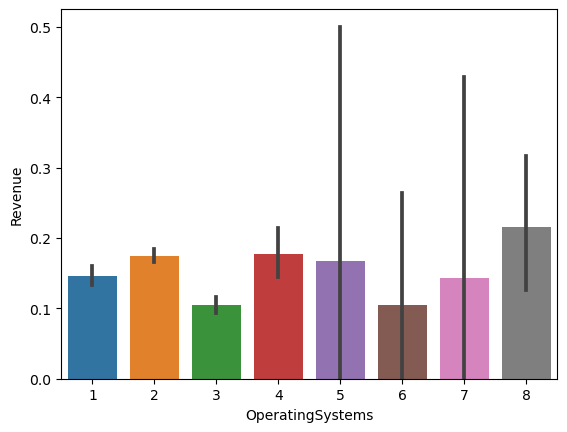

In [52]:
sns.barplot(x='OperatingSystems',y='Revenue',data=data);
plt.show()

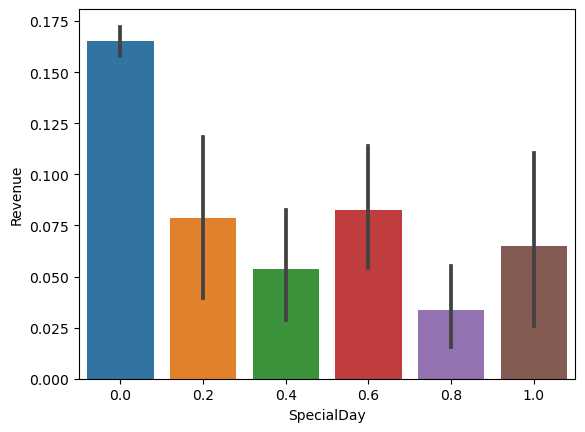

In [54]:
sns.barplot(x='SpecialDay',y='Revenue',data=data);
plt.show()

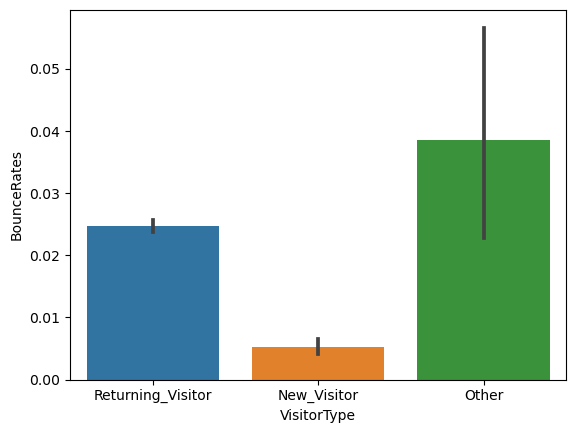

In [55]:
sns.barplot(x='VisitorType',y='BounceRates',data=data);
plt.show()

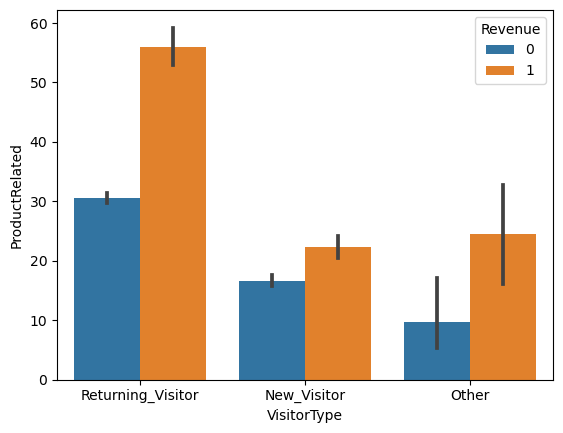

In [56]:
sns.barplot(x='VisitorType',y='ProductRelated',hue='Revenue', data=data);
plt.show()

### INSIGHTS FROM EDA

It is quite obvious that if the customer spends more time on the ecommerce site especially at the Product related pages, the customer is more likely to make a purchase. However, this site has struggled in the amount of time customers spend on the site. This points to improvement in customer surfing experience on the site, a key note for the user experience design team.

Promotions campaign timelines should target weekends, as the data shows more revenue at weekends.
The month of November shows highest revenue generated, Campaigns should also be tailored to utilize this traffic.

Moreso, new visitor values are always significantly lower than returning visitors values. while this is great news in terms of visitors revisiting the site, more efforts towards attracting new visitors should be encouraged.



### Feature Engineering



In [57]:
# Distinguishing numerical and categorical variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

To build the model, 'Month' is dropped

In [58]:
data = data.drop(columns=['Month'], axis=1)

In [59]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,Returning_Visitor,1,0


In [60]:
#Encoding the feature 'visitor Type' using one hot encoding
data = pd.get_dummies(data)

In [61]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,1,0,0,0,1


In [62]:
# instantiating and separating the target variable (label)
from sklearn import preprocessing

insta = preprocessing.LabelEncoder()
insta.fit(data['Revenue'])
data['Revenue'] = insta.transform(data['Revenue'])

In [63]:
target = data['Revenue']
data = data.drop(columns=['Revenue'], axis=1)

In [64]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,1,0,0,1


In [65]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)
data

array([[-0.69699296, -0.4571914 , -0.3964779 , ..., -0.39908696,
        -0.08331632,  0.41062101],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.39908696,
        -0.08331632,  0.41062101],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.39908696,
        -0.08331632,  0.41062101],
       ...,
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.39908696,
        -0.08331632,  0.41062101],
       [ 0.50722805, -0.03291592, -0.3964779 , ..., -0.39908696,
        -0.08331632,  0.41062101],
       [-0.69699296, -0.4571914 , -0.3964779 , ...,  2.50571955,
        -0.08331632, -2.43533571]])

## Training and Testing the dataset

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
#using 75% of the data for training and 25% of the data for testing
X_train, x_test, y_train, y_test = train_test_split(data,target,test_size=0.25,random_state=0)
print(X_train.shape)
print(x_test.shape)

(9247, 18)
(3083, 18)


### Deploying Machine Learning Models
The folowing models were deployed and their performances evaluated to pick the best performer for final prediction;

Logistic Regression

Naive Bayes

Decision Tree

Random Forest

K-nearest-neigbors

In [68]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

In [70]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [71]:
prediction = clf.predict(x_test)

In [72]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test,prediction)
score

0.6718508094466767

In [73]:
#Naive Bayes Model
from sklearn.naive_bayes import GaussianNB

In [74]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [75]:
nb_pred = nb.predict(x_test)

In [76]:
score2 = roc_auc_score(y_test,nb_pred)
score2

0.7168271539753422

In [77]:
#Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

In [78]:
dc = DecisionTreeClassifier()
dc.fit(X_train,y_train)

DecisionTreeClassifier()

In [79]:
dc_pred = dc.predict(x_test)

In [80]:
score3 = roc_auc_score(y_test,dc_pred)
score3

0.7265936121278289

In [81]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [82]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [83]:
rf_pred = rf.predict(x_test)

In [84]:
score4 = roc_auc_score(y_test,rf_pred)
score4

0.7503038967392439

In [85]:
# K-Nearest-Neighbor model
from sklearn.neighbors import KNeighborsClassifier

In [86]:
kn = KNeighborsClassifier()
kn.fit(X_train,y_train)

KNeighborsClassifier()

In [88]:
kn_pred = kn.predict(x_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [89]:
score5 = roc_auc_score(y_test,rf_pred)
score5

0.7503038967392439

The Random forest and K-neighbors Classifier, both with a score of 75% performed better amongst all 5 models deployed. This indicates that both models have better capabilities of distinguishing between all the positives and the negative class points in this particular case.